In [ ]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list the contents of /mydrive
!ls /mydrive

#Navigate to /mydrive/yolov4
%cd /mydrive/yolov4-tiny

/content
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
'00697BD0-0C23-4B83-A3CF-ADDFC455AAD8L0001 (1).jpeg'
 00697BD0-0C23-4B83-A3CF-ADDFC455AAD8L0001.jpeg
 0812F27F-5648-4C91-AC9E-4661BD752555L0001.jpeg
'105E8623-DD90-4775-9AF8-1B6049A82E49L0001 (1).jpeg'
 105E8623-DD90-4775-9AF8-1B6049A82E49L0001.jpeg
 1631331649300.jpg
 1631331649312.jpg
 1631331649318.jpg
'1840337A-AD8B-4746-A793-22D213893820L0001 (1).jpeg'
 1840337A-AD8B-4746-A793-22D213893820L0001.jpeg
 20240715-0959-14.9132636.mp4
'2.0 Case Study on Virtual Online Store'$'\n'' '$'\n''A new st....gsheet'
 30C0DAE0-0506-4CC2-BAF2-6F276530374FL0001.jpeg
'4BBE4BF8-7E83-45A3-896B-F88143A1A913L0001 (1).jpeg'
 4BBE4BF8-7E83-45A3-896B-F88143A1A913L0001.jpeg
 52F6B38D-955C-484C-B481-BE88C950613A.jpeg
 66177259-3DEE-4765-ABA5-24894460881FL0001.jpeg
'6C8268C3-AFDB-434F-812C-BE0F4DE7D856L00

In [ ]:
# !git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [ ]:
# change makefile to have GPU and OPENCV enabled
# also set CUDNN, CUDNN_HALF and LIBSO to 1

%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/gdrive/MyDrive/yolov4-tiny/darknet


In [ ]:
# build darknet
!make

mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unu

In [ ]:
# Clean the data and cfg folders first except the labels folder in data which is required
%cd data/
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..

%rm -rf cfg/
%mkdir cfg

[Errno 2] No such file or directory: 'data/'
/content/gdrive/My Drive/yolov4-tiny
/content/gdrive/My Drive


In [ ]:
# Unzip the obj.zip dataset and its contents so that they are now in /darknet/data/ folder

!unzip /mydrive/yolov4-tiny/obj.zip -d data/

unzip:  cannot find or open /mydrive/yolov4-tiny/obj.zip, /mydrive/yolov4-tiny/obj.zip.zip or /mydrive/yolov4-tiny/obj.zip.ZIP.


In [ ]:
# Copy the yolov4-custom.cfg file so that it is now in /darknet/cfg/ folder

!cp /mydrive/yolov4-tiny/yolov4-tiny-custom.cfg cfg

# verify if your custom file is in cfg folder
!ls cfg/

In [ ]:
# Copy the obj.names and obj.data files from your drive so that they are now in /darknet/data/ folder

!cp /mydrive/yolov4-tiny/obj.names data
!cp /mydrive/yolov4-tiny/obj.data  data

# verify if the above files are in data folder
!ls data/

In [ ]:
# Copy the process.py file to the current darknet directory

!cp /mydrive/yolov4-tiny/process.py .

In [ ]:
# run process.py ( this creates the train.txt and test.txt files in our darknet/data folder )
!python process.py

# list the contents of data folder to check if the train.txt and test.txt files have been created
!ls data/

In [ ]:
# Download the yolov4 pre-trained weights file
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4-tiny.conv.29

--2025-06-05 11:08:49--  https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4-tiny.conv.29
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-06-05 11:08:50 ERROR 404: Not Found.



In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture

!./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg yolov4-tiny.conv.29 -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.822358), count: 4, class_loss = 0.291626, iou_loss = 0.612540, total_loss = 0.904166 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.856438), count: 2, class_loss = 0.248257, iou_loss = 1.168543, total_loss = 1.416800 
 total_bbox = 915314, rewritten_bbox = 0.186384 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.885314), count: 4, class_loss = 0.008903, iou_loss = 0.151506, total_loss = 0.160409 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.729014), count: 3, class_loss = 0.112620, iou_loss = 5.047289, total_loss = 5.159909 
 total_bbox = 915321, rewritten_bbox = 0.186383 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.814692), count: 4, class_loss = 0.078928, iou_loss = 0.407993, total_loss = 0.486921 
v3 (iou

In [ ]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

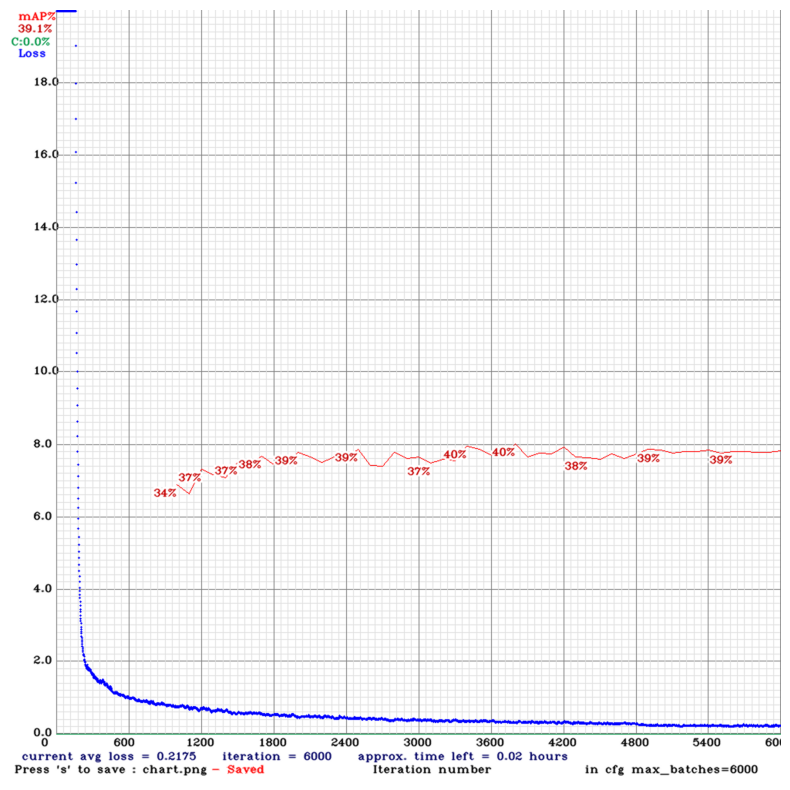

In [ ]:
#only works if the training does not get interrupted
imShow('chart.png')

In [ ]:
##You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 snd so on )

!./darknet detector map data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_4000.weights -points 0

 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	   

In [ ]:
# Code from theAIGuysCode Github (https://github.com/theAIGuysCode/YOLOv4-Cloud-Tutorial/blob/master/yolov4_webcam.ipynb)
# Adjusted for my custom YOLOv4 trained weights, config and obj.data files

# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline


# import darknet functions to perform object detections
# from darknet import * # Remove this line

# load in our YOLOv4 architecture network - this information will be passed to the shell command
config_path = "cfg/yolov4-tiny-custom.cfg"
data_path = "data/obj.data"
weights_path = "/mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights"

# darknet helper function to run detection on image
def darknet_helper(img, config_path, data_path, weights_path):
  # Save the image to a temporary file
  img_path = "temp.jpg"
  cv2.imwrite(img_path, img)

  # Construct the darknet command
  darknet_command = f'./darknet detector test {data_path} {config_path} {weights_path} {img_path} -dont_show -out result.png'

  # Run the darknet command
  !{darknet_command}

  # Load the image with detections
  # Darknet saves the output with 'predictions_' prefix by default, but we specified -out result.png
  predicted_img_path = "result.png"
  predicted_img = cv2.imread(predicted_img_path)

  # Clean up the temporary image and result files
  !rm {img_path}
  !rm {predicted_img_path}

  # For bounding box information, you would typically parse the output of darknet
  # However, the current darknet command does not output coordinates in a readily parsable format.
  # To get bounding box data programmatically, you would need to use the Darknet Python API if available and correctly installed,
  # or modify the Darknet C code to output the coordinates in a structured format.
  # For this fix, we will only display the resulting image with bounding boxes drawn by darknet.
  # Therefore, we return the predicted image directly.
  return predicted_img

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # Run darknet detection on the frame
    predicted_frame = darknet_helper(frame, config_path, data_path, weights_path)

    # convert OpenCV image to base64 bytes
    # We use cv2.imencode to get the bytes of the image
    retval, buffer = cv2.imencode('.png', predicted_frame)
    bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(buffer), 'utf-8')))

    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

MessageError: NotAllowedError: Permission denied

In [ ]:
# run your custom detector on a video with this command (upload a video to your google drive to test, the thresh flag sets the minimum accuracy required for object detection).This saves the output video with the detections in your output path

!./darknet detector demo data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights -dont_show /mydrive/yolov4-tiny/video1.mp4 -i 0 -out_filename /mydrive/yolov4-tiny/finalresult.avi

Streaming output truncated to the last 5000 lines.
pothole: 86% 
pothole: 85% 
pothole: 84% 
pothole: 75% 
pothole: 48% 
pothole: 39% 
pothole: 38% 

FPS:35.4 	 AVG_FPS:37.8

 cvWriteFrame 
Objects:

pothole: 98% 
pothole: 98% 
pothole: 94% 
pothole: 92% 
pothole: 87% 
pothole: 86% 
pothole: 86% 
pothole: 59% 
pothole: 52% 
pothole: 45% 
pothole: 29% 

FPS:36.3 	 AVG_FPS:37.8

 cvWriteFrame 
Objects:

pothole: 98% 
pothole: 92% 
pothole: 90% 
pothole: 90% 
pothole: 84% 
pothole: 81% 
pothole: 70% 
pothole: 66% 
pothole: 50% 
pothole: 43% 

FPS:35.7 	 AVG_FPS:37.8

 cvWriteFrame 
Objects:

pothole: 98% 
pothole: 94% 
pothole: 91% 
pothole: 87% 
pothole: 82% 
pothole: 74% 
pothole: 45% 
pothole: 42% 
pothole: 36% 
pothole: 35% 
pothole: 28% 
pothole: 26% 

FPS:35.3 	 AVG_FPS:37.8

 cvWriteFrame 
Objects:

pothole: 99% 
pothole: 97% 
pothole: 93% 
pothole: 88% 
pothole: 86% 
pothole: 84% 
pothole: 83% 
pothole: 67% 
pothole: 50% 
pothole: 33% 

FPS:36.6 	 AVG_FPS:37.8

 cvWriteFrame 
Obje

In [ ]:
%cd /content
!git clone https://github.com/hunglc007/tensorflow-yolov4-tflite.git
%cd tensorflow-yolov4-tflite

/content
Cloning into 'tensorflow-yolov4-tflite'...
remote: Enumerating objects: 790, done.
remote: Total 790 (delta 0), reused 0 (delta 0), pack-reused 790 (from 1)
Receiving objects: 100% (790/790), 197.64 MiB | 24.71 MiB/s, done.
Resolving deltas: 100% (375/375), done.
/content/tensorflow-yolov4-tflite


In [ ]:
!pip uninstall -y tensorflow keras

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0


In [ ]:
!pip install tensorflow==2.10 keras==2.11

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 109.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 36.2 MB/s eta 0:00:00

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.1/997.1 kB 49.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 3.0.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.12.0 which is incompatible.


Found existing installation: keras 3.0.0
Uninstalling keras-3.0.0:
  Successfully uninstalled keras-3.0.0
ERROR: Could not find a version that satisfies the requirement tensorflow==2.11 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.11


In [ ]:
!python save_model.py --weights  /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights --output /mydrive/yolov4-tiny/yolov4-tiny-pb --input_size 416 --model yolov4 --framework tflite --tiny

2025-06-06 08:43:15.323927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749199395.362001    8392 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749199395.372686    8392 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-06 08:43:15.416016: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-06 08:43:22.246847: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("/mydrive/yolov4-tiny/yolov4-tiny-pb")
model.summary()

ValueError: File format not supported: filepath=/mydrive/yolov4-tiny/yolov4-tiny-pb. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(/mydrive/yolov4-tiny/yolov4-tiny-pb, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

Now that the TensorFlow model is saved, we can convert it to a TFLite model.

In [ ]:
!python convert_tflite.py --weights /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights --output /mydrive/yolov4-tiny/yolov4-tiny-tflite.tflite --input_size 416 --model yolov4 --tiny --classes /mydrive/yolov4-tiny/obj.names --tflite_model_save_path /mydrive/yolov4-tiny/yolov4-tiny.tflite

2025-06-04 17:33:42.459770: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749058422.477588  832601 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749058422.482962  832601 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-04 17:33:46.351348: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1749058426.351505  832601 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
